# Traçando gráficos com matplotlib
Usando matplotlib para criar gráficos de barras que permitam visualizar as conclusões que foram tiradas com groupby e query.

In [20]:
# Importando os pacotes necessários e carregando o arquivo `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### #1: Será que vinhos com maior teor alcóolico recebem avaliações melhores?
Criando um gráfico de barras com uma barra para amostras de vinho com baixo teor alcóolico e outra para amostras com alto teor alcóolico.

In [17]:
# Use query para selecionar cada grupo e obter sua qualidade média
median = wine_df['alcohol'].median()
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

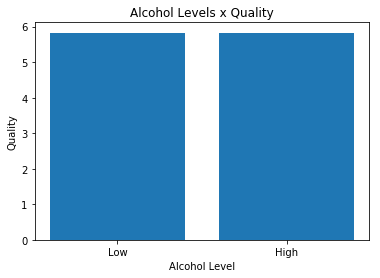

In [21]:
locations=[1,2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Alcohol Levels x Quality')
plt.xlabel('Alcohol Level')
plt.ylabel('Quality');

### #2: Vinhos mais suaves recebem avaliações melhores?
Criando um gráfico de barras com uma barra para amostras de vinho com baixo nível de açúcar residual e outra para amostras com alto nível de açúcar residual.

In [19]:
# query para selecionar cada grupo e obter sua qualidade média
median = wine_df['residual_sugar'].median()
low = wine_df.query('residual_sugar < {}'.format(median))
high = wine_df.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

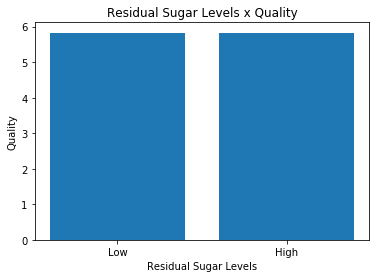

In [22]:
# Criando um gráfico de barras com rótulos adequados
locations=[1,2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Residual Sugar Levels x Quality')
plt.xlabel('Residual Sugar Levels')
plt.ylabel('Quality');